[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rudineyspereira/notebook-share/Geopandas_Ambiente_Python_Cientifico_Academico_Parte_III.ipynb)

#Biblioteca Geopandas: Dados Geoespaciais

**GeoPandas** é uma biblioteca *opensource* da linguagem Python desenvolvida com o objetivo de realizar análise de dados geoespaciais permitindo a manipulação dos dados e visualização de resultados.

Inclui funcionalidades da biblioteca **Pandas** o que permite utilizar os comandos dessa para realizar as análises. Praticamente, todos os comandos que se conhece de Pandas funciona com a biblioteca GeoPandas.

####Instalação de bibliotecas

In [1]:
!pip install geopandas
!pip install matplotlib

###**Baixando dados espaciais**
Os dados espaciais são obtidos para o Estado do Rio Grande do Sul para todos os municípios em formato 'shapefile'.

Você pode encontrar um catálogo de dados por estado no site do IBGE: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=downloads

Para o download dos dados espaciais, você pode usar o comando 'wget' ou ainda no MacOS, use o comando curl -O).

Após efetuar o download, descompacte em uma pasta que aqui, denominamos "dados". Nessa pasta, vamos ter um conjunto de arquivos com o nome "RS_Municipios_2022".

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Limites do RS

RS = gpd.read_file('/content/drive/MyDrive/dados/RS_Municipios_2022.shp')

In [6]:
RS.head(5)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,4300001,Lagoa Mirim,RS,2884.340,"POLYGON ((-52.62752 -32.15022, -52.62816 -32.1..."
1,4300002,Lagoa dos Patos,RS,10201.524,"POLYGON ((-52.09720 -32.16167, -52.09926 -32.1..."
2,4300034,Aceguá,RS,1551.339,"POLYGON ((-54.21884 -31.82901, -54.23601 -31.8..."
3,4300059,Água Santa,RS,291.503,"POLYGON ((-51.98166 -28.23639, -51.98066 -28.2..."
4,4300109,Agudo,RS,534.624,"POLYGON ((-53.26702 -29.78223, -53.26766 -29.7..."


Determinando as coordenadas do centróide do Rio Grande do Sul.

In [7]:
# Determinar o centróide do polígono 'polig'
centro_RS = RS.centroid
print('Coordenadas do centróide do polígono RS = ',centro_RS)

Coordenadas do centróide do polígono RS =  0      POINT (-52.97109 -32.75083)
1      POINT (-51.35837 -31.06502)
2      POINT (-54.13918 -31.69065)
3      POINT (-52.05174 -28.21386)
4      POINT (-53.22658 -29.60809)
                  ...             
494    POINT (-51.78219 -28.82075)
495    POINT (-53.70075 -27.26576)
496    POINT (-54.46365 -28.38172)
497    POINT (-51.74294 -29.40638)
498    POINT (-50.06970 -29.80792)
Length: 499, dtype: geometry


<ipython-input-7-02e719972682>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centro_RS = RS.centroid


In [8]:
RS = RS.to_crs(epsg=4326)
print(RS.crs)
RS.head()

EPSG:4326


,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,4300001,Lagoa Mirim,RS,2884.340,"POLYGON ((-52.62752 -32.15022, -52.62816 -32.1..."
1,4300002,Lagoa dos Patos,RS,10201.524,"POLYGON ((-52.09720 -32.16167, -52.09926 -32.1..."
2,4300034,Aceguá,RS,1551.339,"POLYGON ((-54.21884 -31.82901, -54.23601 -31.8..."
3,4300059,Água Santa,RS,291.503,"POLYGON ((-51.98166 -28.23639, -51.98066 -28.2..."
4,4300109,Agudo,RS,534.624,"POLYGON ((-53.26702 -29.78223, -53.26766 -29.7..."


In [9]:
# import Folium
import folium

In [10]:
valores_centroide = RS.centroid.to_crs(epsg=4326)
valores_centroide

x = valores_centroide.x.iloc[0]
y = valores_centroide.y.iloc[0]
x, y

<ipython-input-10-230ac019f9d6>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  valores_centroide = RS.centroid.to_crs(epsg=4326)


(-52.971087996265126, -32.75083424716306)

In [11]:
RS = RS.to_crs(epsg=4326)
RS

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,4300001,Lagoa Mirim,RS,2884.340,"POLYGON ((-52.62752 -32.15022, -52.62816 -32.1..."
1,4300002,Lagoa dos Patos,RS,10201.524,"POLYGON ((-52.09720 -32.16167, -52.09926 -32.1..."
2,4300034,Aceguá,RS,1551.339,"POLYGON ((-54.21884 -31.82901, -54.23601 -31.8..."
3,4300059,Água Santa,RS,291.503,"POLYGON ((-51.98166 -28.23639, -51.98066 -28.2..."
4,4300109,Agudo,RS,534.624,"POLYGON ((-53.26702 -29.78223, -53.26766 -29.7..."
...,...,...,...,...,...
494,4323606,Vista Alegre do Prata,RS,119.327,"POLYGON ((-51.71175 -28.78423, -51.70670 -28.7..."
495,4323705,Vista Gaúcha,RS,90.022,"POLYGON ((-53.70393 -27.30702, -53.70482 -27.3..."
496,4323754,Vitória das Missões,RS,258.312,"POLYGON ((-54.44172 -28.33886, -54.43306 -28.3..."
497,4323770,Westfália,RS,63.665,"POLYGON ((-51.78123 -29.44686, -51.78123 -29.4..."


In [12]:
base = folium.Map([y,x], zoom_start=5, tiles='OpenStreetMap')
folium.Marker(location=[y,x]).add_to(base)
folium.Choropleth(RS).add_to(base)
base

Output hidden; open in https://colab.research.google.com to view.

###**Lendo os arquivos de dados espaciais**<br>
Vamos utilizar o geopandas para isso.

In [14]:
mun_RS = gpd.read_file('/content/drive/MyDrive/dados/RS_Municipios_2022.shp')

In [15]:
mun_RS.head(9)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,4300001,Lagoa Mirim,RS,2884.340,"POLYGON ((-52.62752 -32.15022, -52.62816 -32.1..."
1,4300002,Lagoa dos Patos,RS,10201.524,"POLYGON ((-52.09720 -32.16167, -52.09926 -32.1..."
2,4300034,Aceguá,RS,1551.339,"POLYGON ((-54.21884 -31.82901, -54.23601 -31.8..."
3,4300059,Água Santa,RS,291.503,"POLYGON ((-51.98166 -28.23639, -51.98066 -28.2..."
4,4300109,Agudo,RS,534.624,"POLYGON ((-53.26702 -29.78223, -53.26766 -29.7..."
5,4300208,Ajuricaba,RS,322.674,"POLYGON ((-53.75436 -28.27502, -53.75464 -28.2..."
6,4300307,Alecrim,RS,316.394,"POLYGON ((-54.75308 -27.57503, -54.75098 -27.5..."
7,4300406,Alegrete,RS,7800.428,"POLYGON ((-55.87948 -30.07069, -55.88154 -30.0..."
8,4300455,Alegria,RS,172.794,"POLYGON ((-54.05970 -27.76521, -54.05956 -27.7..."


###**Visualização dos dados**

Instalar a biblioteca descartes.

In [16]:
!pip install descartes

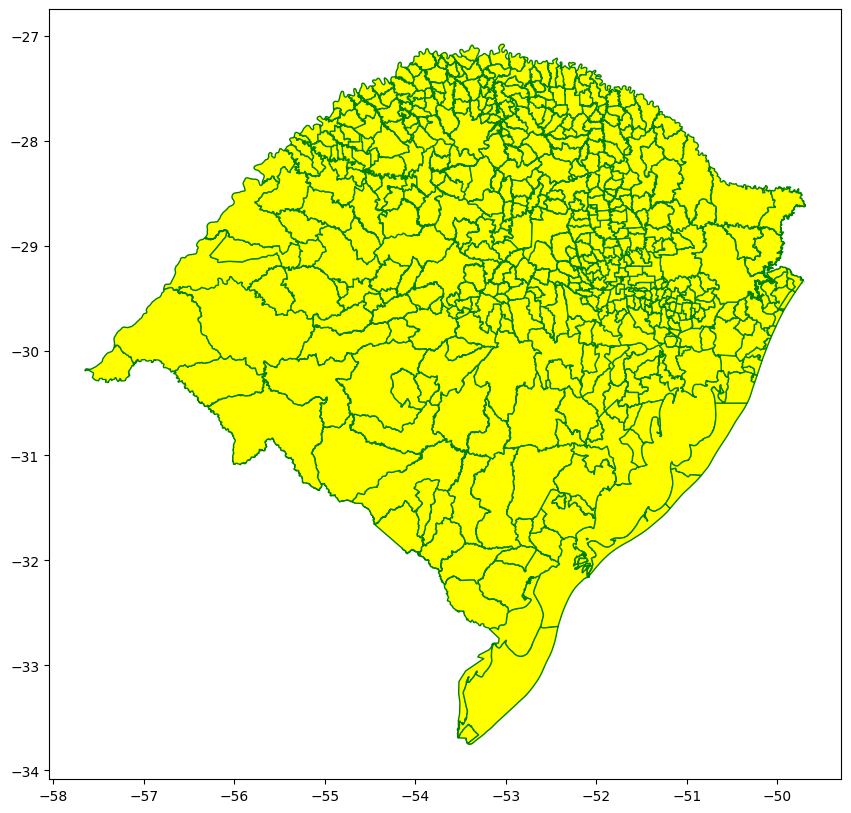

In [17]:
mun_RS.plot(figsize=(14,10), facecolor='yellow', edgecolor='green')
plt.show()

###**Salvando os dados**

In [18]:
mun_RS.head(6)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,4300001,Lagoa Mirim,RS,2884.340,"POLYGON ((-52.62752 -32.15022, -52.62816 -32.1..."
1,4300002,Lagoa dos Patos,RS,10201.524,"POLYGON ((-52.09720 -32.16167, -52.09926 -32.1..."
2,4300034,Aceguá,RS,1551.339,"POLYGON ((-54.21884 -31.82901, -54.23601 -31.8..."
3,4300059,Água Santa,RS,291.503,"POLYGON ((-51.98166 -28.23639, -51.98066 -28.2..."
4,4300109,Agudo,RS,534.624,"POLYGON ((-53.26702 -29.78223, -53.26766 -29.7..."
5,4300208,Ajuricaba,RS,322.674,"POLYGON ((-53.75436 -28.27502, -53.75464 -28.2..."


In [19]:
# Salvando apenas os dados do Município de Santa Maria
# Temos de filtrar os dados apenas para Santa Maria
#
mun_RS[mun_RS['NM_MUN'] == 'Santa Maria']

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
366,4316907,Santa Maria,RS,1780.194,"POLYGON ((-53.81896 -29.62230, -53.81865 -29.6..."


In [20]:
# Para apresentar apenas o polígono referente ao Município de Santa Maria
# Devo guardar em uma variável a geometria de Santa Maria
# Para isso, criamos a variável gpd_SMA
gpd_SMA = mun_RS[mun_RS['NM_MUN'] == 'Santa Maria']

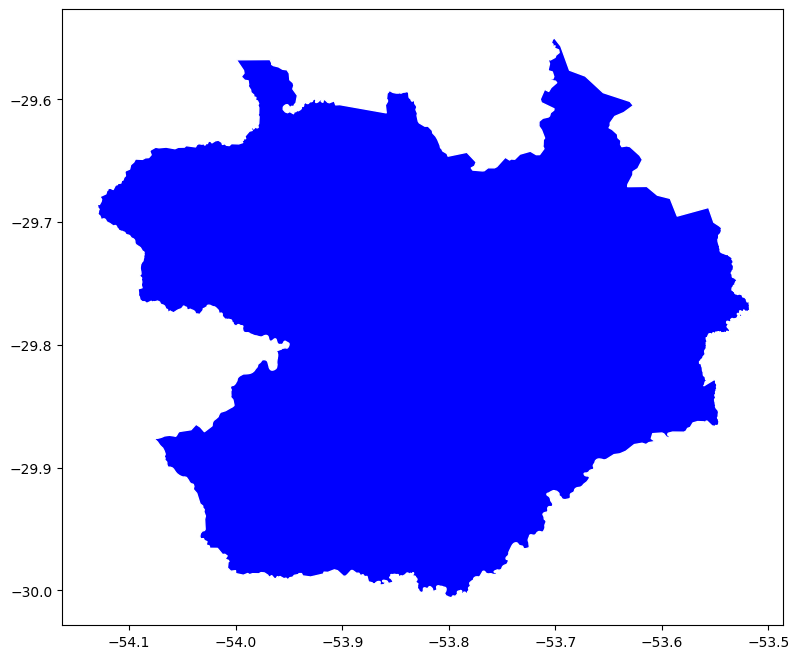

In [21]:
# Para apresentar o polígono, usamos o plot
gpd_SMA.plot(figsize=(10,8), facecolor='blue', edgecolor='white')
plt.show()

###**Salvando os arquivos no formato GeoJSON**

In [23]:
# a árvore de acesso aos dados deve estar presente no drive
# árvore no Drive: '/content/drive/MyDrive/Workdata/Dados_IBGE/RS/rs_municipios/'
# modificado para /content/drive/MyDrive/dados/sma.json
gpd_SMA.to_file("/content/drive/MyDrive/dados/sma.json", driver="GeoJSON")

Para simplificar o processo de leitura, podemos adotar uma variável contendo o caminho e após, chamar o arquivo com o método *.read_file*.

In [24]:
# Podemos repetir o código da linha acima e, no caminho associamos à uma variável.
#
filename = "/content/drive/MyDrive/dados/sma_alternativo.json"
gpd_SMA.to_file(filename, driver="GeoJSON")

In [25]:
# Para fazer a leitura de forma simplificada
#
gpd_SMA_alter = gpd.read_file(filename, driver="GeoJSON")

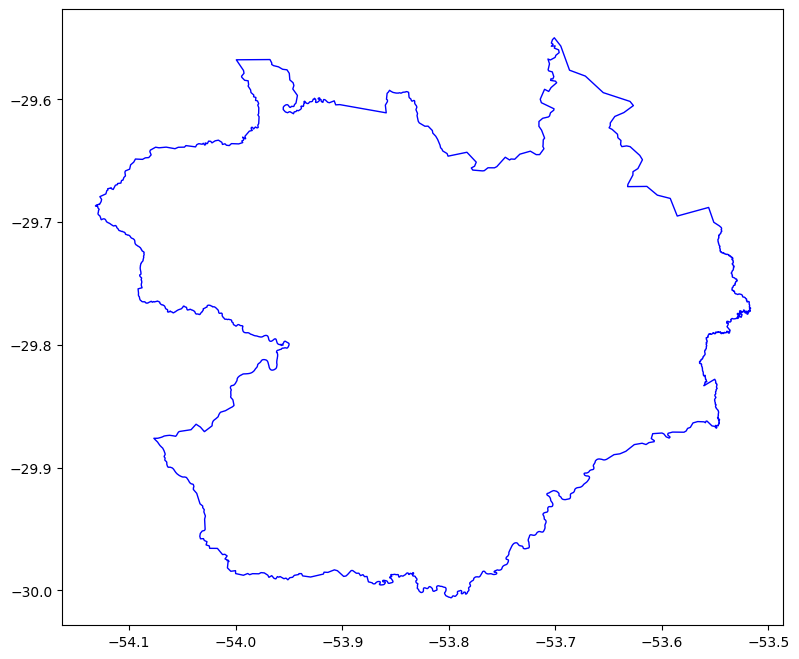

In [26]:
# Apresentar o arquivo lido
gpd_SMA_alter.plot(figsize=(10,8), facecolor="white", edgecolor="blue")
plt.show()

###**Objetos geométricos em dados espaciais**<br>
Os objetos geométricos fundamentais para trabalhar com dados espaciais são: *Points, Lines e Polygons*. Em Python podemos usar a biblioteca **Shapely** para definir e realizar operações com os objetos geométricos. São possíveis as funcionalidades:

. Criar objetos básicos: Point, Line, Polygon e outros;<br>
. Calcular área, tamanho, limite dos objetos geométricos;<br>
. Realizar operações geométricas, como: Union, Intersection, Difference, Distance entre outras;<br>
. Realizar consultas espaciais entre geometrias, como: Intersects, Touches, Crosses, Within entre outras.<br><br>
Os objetos geométricos são tuplas de coordenadas, em que:

. *Point:* representa um ponto no espaço. Podendo ser bidimensional (x, y) ou tridimensional (x, y, z);<br>
. *LineString:* representa uma sequência de pontos para formar uma linha. Uma linha consiste de pelo menos dois pontos.<br>
. *Polygon:* representa um polígono preenchido, formado por uma lista de pelo menos três pontos, que indicam uma estrutura de anel externo. Os polígonos também podem apresentar aberturas internas (buracos).<br><br>
É possível instalar o módulo **shapely** em nosso ambiente através do comando:

In [27]:
# Instalando o módulo 'shapely'
!pip install shapely

In [28]:
# Importando os objetos geométricos de 'shapely'
from shapely.geometry import Point, LineString, Polygon

In [29]:
# Criar uma geometria do tipo 'Point'
ponto = Point(5,10)

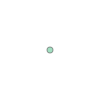

In [30]:
# Vendo o ponto no Jupyter
ponto

In [31]:
# Mostrando as coordenadas do 'ponto'
print(ponto)

POINT (5 10)


In [32]:
# Mostrando o tipo da variável 'ponto'
type(ponto)

shapely.geometry.point.Point

###**Ponto - Atributos e funções**
Os objetos do tipo *Point* já possuem atributos e funções internas para realizar operações básicas. Uma das funções mais simples é a capacidade de extrair as coordenadas e a possibilidade de calcular a distância entre dois pontos.

Podemos obter as coordenadas *x* e *y* de diferentes maneiras:

In [ ]:
# Utilize a função 'coords'
list(ponto.coords)

[(5.0, 10.0)]

In [ ]:
# Lendo as coordenadas de forma separada
#
x = ponto.x
y = ponto.y

In [ ]:
print(x)
print(y)

5.0
10.0


In [ ]:
# Ou também, na seguinte linha
print(x, y)

5.0 10.0


In [ ]:
# Dado 2 pontos de coordenadas 'x' e 'y' para cada ponto, o cálculo da distância
# entre os pontos pode ser obtido assim:
pto_1 = Point(3,6)
pto_2 = Point(2,9)

distancia = pto_1.distance(pto_2)
distancia

3.1622776601683795

###**LineString - Atributos e funções**

O objeto *LineString* possui diversos atributos e funções internas. Algumas operações possíveis com o objeto do tipo linha:

. Extrair as coordenadas;<br>
. Calcular o tamanho da linha;<br>
. Calcular o ponto médio (centróide).<br>

A lista completa de funcionalidades pode ser acessada na documentação da biblioteca.

Vamos ver algumas dessas funções:



In [ ]:
# Criar uma linha a partir de 3 pontos
pto_1 = Point(2,3)
pto_2 = Point(5,7)
pto_3 = Point(2,10)
pto_4 = Point(3,7)
#
# Criando a linha
linha = LineString([pto_1,pto_2,pto_3,pto_4])

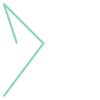

In [ ]:
# Mostrando a linha
linha

In [ ]:
print(linha)

LINESTRING (2 3, 5 7, 2 10, 3 7)


In [ ]:
type(linha)

shapely.geometry.linestring.LineString

In [ ]:
# Extrair as coordenadas da 'LineString' similar ao objeto Point.
list(linha.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0), (3.0, 7.0)]

In [ ]:
# Lendo as coordenadas de forma separada
coord_x = list(linha.xy[0])
coord_y = list(linha.xy[1])
print('Coord. x = ',coord_x)
print('Coord. y = ',coord_y)

Coord. x =  [2.0, 5.0, 2.0, 3.0]
Coord. y =  [3.0, 7.0, 10.0, 7.0]


####Comprimento da linha

In [ ]:
linha.length

12.404918347287664

####Centróide de uma linha

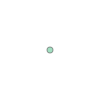

In [ ]:
linha.centroid

In [ ]:
# Para retornar as coordenadas do centróide, usamos o comando 'print'
print(linha.centroid)

POINT (3.245078720259387 7.089269230955772)


####**Polígonos - Atributos e funções**<br>
Podemos acessar diferentes funções diretamente do objeto Polygon, que são úteis para muitas tarefas e análises, como:<br>
. Obter área, centróide, bounding box, o exterior e o perímetro (tamanho exterior).

Aqui, podemos ver alguns atributos disponíveis e como acessá-los:

In [ ]:
# Criando um polígono, passando-se as variáveis.
# No polígono, o Python considera as coordenadas do último ponto iguais as
# coordenadas do primeiro ponto.
polig = Polygon([(2,3),(5,8),(2,10)])

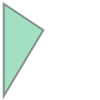

In [ ]:
# Apresentando o polígono 'polig' criado.
polig

In [ ]:
# Mostrar o 'polig' usando o comando print
print(polig)

POLYGON ((2 3, 5 8, 2 10, 2 3))


In [ ]:
# Tipo da variável 'polig'
type(polig)

shapely.geometry.polygon.Polygon

In [ ]:
# Obter as coordenadas do polígono 'polig'
polig.exterior.coords

In [ ]:
# Mostrar as coordenadas do polígono 'polig'
list(polig.exterior.coords)

[(2.0, 3.0), (5.0, 8.0), (2.0, 10.0), (2.0, 3.0)]

In [ ]:
# Determinar a área do polígono 'polig'
area_polig = polig.area
print('Área do polígono = ',area_polig)

Área do polígono =  10.5


In [ ]:
# Determinar o centróide do polígono 'polig'
centro_polig = polig.centroid
print('Centróide do polígono = ',centro_polig)

Centróide do polígono =  POINT (3 7)


In [ ]:
# Retornar as coordenadas mínimas e máximas do polígono 'polig'
borda_polig = polig.bounds
print('Coord. min e max do polígono = ',borda_polig)

Coord. min e max do polígono =  (2.0, 3.0, 5.0, 10.0)


In [ ]:
# Pegar as coordenadas do polígono 'polig'
limite_polig = polig.exterior

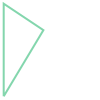

In [ ]:
# Mostrar o polígono 'polig'
limite_polig

In [ ]:
# Imprimindo as coordenadas do polígono (coordenadas exterior)
print('Coord. Exterior = ',limite_polig)

Coord. Exterior =  LINEARRING (2 3, 5 8, 2 10, 2 3)


In [ ]:
# Obter o tamanho (comprimento da linha) exterior
comp_exterior = polig.exterior.length
print('Comprimento exterior (perímetro) = ',comp_exterior)

Comprimento exterior (perímetro) =  16.43650317030929


####**Operações básicas entre geometrias**

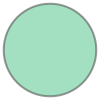

In [ ]:
# Criando dois círculos usando as coordenadas e o método 'buffer'
circulo_1 = Point(1,1).buffer(1)
circulo_2 = Point(2,1).buffer(1)
# vendo o círculo 1
circulo_1

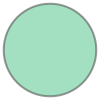

In [ ]:
# olhando o circulo 2
circulo_2

In [ ]:
# Observando-se as coordenadas do 'circulo_1'
print(circulo_1)

POLYGON ((2 1, 1.995184726672197 0.9019828596704393, 1.9807852804032304 0.8049096779838718, 1.9569403357322088 0.7097153227455377, 1.9238795325112867 0.6173165676349102, 1.881921264348355 0.5286032631740023, 1.8314696123025453 0.4444297669803978, 1.7730104533627369 0.3656067158363545, 1.7071067811865475 0.2928932188134525, 1.6343932841636455 0.226989546637263, 1.5555702330196022 0.1685303876974548, 1.471396736825998 0.1180787356516451, 1.3826834323650898 0.0761204674887133, 1.2902846772544623 0.0430596642677911, 1.1950903220161284 0.0192147195967696, 1.0980171403295609 0.0048152733278032, 1 0, 0.9019828596704393 0.0048152733278031, 0.8049096779838718 0.0192147195967696, 0.7097153227455378 0.0430596642677911, 0.6173165676349103 0.0761204674887133, 0.5286032631740023 0.118078735651645, 0.444429766980398 0.1685303876974545, 0.3656067158363546 0.2269895466372629, 0.2928932188134525 0.2928932188134524, 0.226989546637263 0.3656067158363545, 0.1685303876974546 0.4444297669803978, 0.1180787356

####**Mostrar os círculos (polígonos)**

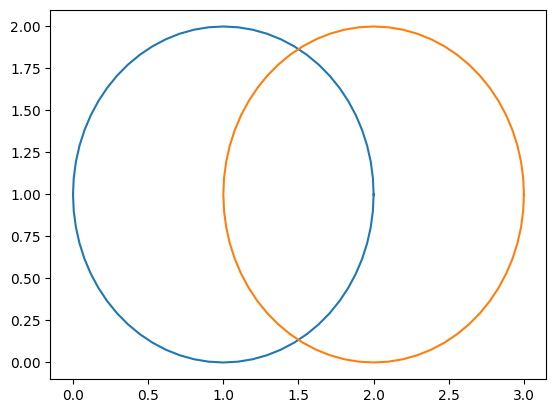

In [ ]:
# Usando a biblioteca Matplotlib
import matplotlib.pyplot as plt

x, y = circulo_1.exterior.xy
plt.plot(x,y)

x, y = circulo_2.exterior.xy
plt.plot(x,y)

plt.show()

####**Interseção entre as geometrias**

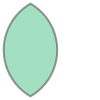

In [ ]:
intersecao_geo = circulo_1.intersection(circulo_2)
intersecao_geo

####**União entre as geometrias**

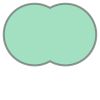

In [ ]:
uniao_geo = circulo_1.union(circulo_2)
uniao_geo

####**Diferença entre geometrias***

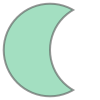

In [ ]:
# Diferença circulo_1 - circulo_2
diferenca_entre_circulos = circulo_1.difference(circulo_2)
diferenca_entre_circulos

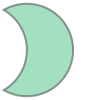

In [ ]:
# Diferença circulo_2 - circulo_1
dif_c2c1 = circulo_2.difference(circulo_1)
dif_c2c1

####**Diferença simétrica entre geometrias**

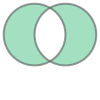

In [ ]:
dif_simetrica_geo = circulo_1.symmetric_difference(circulo_2)
dif_simetrica_geo